In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df_US = df[(df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
df_US['salary_year_avg'].sample(10)

371927     92500.0
455453     90000.0
716612    112500.0
536154    168000.0
448887    170000.0
449660    160000.0
623379     94700.0
2617      177500.0
758469    130000.0
330726    107500.0
Name: salary_year_avg, dtype: float64

<Axes: >

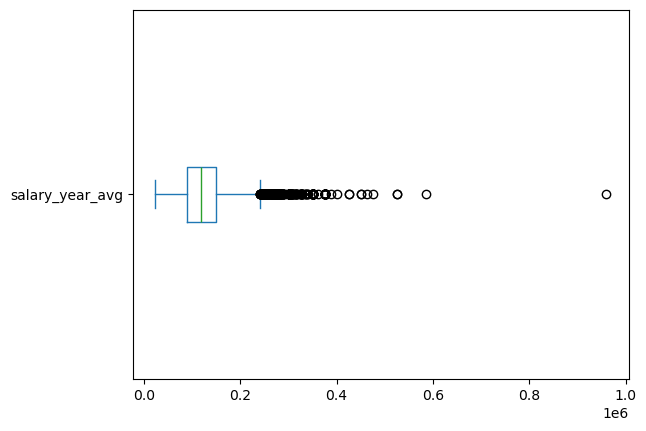

In [3]:
df_US['salary_year_avg'].plot(kind='box', vert=False)

In [10]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles))].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    5922
Data Analyst      5451
Data Engineer     4500
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13456\3791061217.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


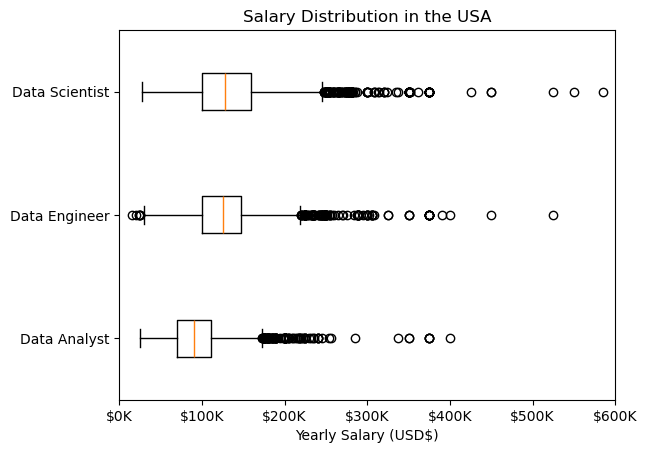

In [17]:
job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.title('Salary Distribution in the USA')
plt.xlabel('Yearly Salary (USD$)')
plt.show()